# Mobile Phone Prediction Model

### I am going to use all the following algorithm and will compare their accuracy on the based of different parameters

- 1. Linear Regression
- 2. Polynomial Regression
- 3. Neural Network
- 4. Decision Tree
- 5. Random Forest
- 6. Gradient Boosting
- 7. Support Vector Regression
- 8. Bayesian Regression
- 9. K-Nearest Neighbors
- 10. XG Boost

We have 19 Features and 1 Target Variable

### Author : Ritul Kumawat [2022TT11357]

### Bonus Task Done : Setting up the local enviornment

In [17]:
# Creating a error function

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def findError(Y_test_array, Y_pred_array):
    # Calculate MAE
    mae = mean_absolute_error(Y_test_array, Y_pred_array)

    # Calculate MSE
    mse = mean_squared_error(Y_test_array, Y_pred_array)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate RMSLE
    masked_Y_test = np.maximum(Y_test_array, 0)
    masked_Y_pred = np.maximum(Y_pred_array, 0)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(masked_Y_test) - np.log1p(masked_Y_pred))))

    percentage_error = (np.abs(Y_pred_array - Y_test_array) / Y_test_array) * 100

    # Calculate the mean of the percentage error
    mean_percentage_error = np.mean(percentage_error)

    # Print the mean percentage error
    print("Mean Percentage Error:", mean_percentage_error)

    # Print the results
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

In [18]:
# Finalizing the Data
import pandas as pd

data = pd.read_csv('./mobile_phone.csv')

data.describe()


,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,...,12.306500,5.767000,11.011000,0.521500,0.761500,0.503000,0.509500,0.4950,0.507000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,...,4.213245,4.356398,5.463955,0.499662,0.426273,0.500116,0.500035,0.5001,0.500076,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,...,9.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,...,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,1.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


In [19]:
data.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2000 non-null   int64  
 1   Clock_Speed    2000 non-null   float64
 2   FC             2000 non-null   int64  
 3   Int_Memory     2000 non-null   int64  
 4   Mobile_D       2000 non-null   float64
 5   Mobile_W       2000 non-null   int64  
 6   Cores          2000 non-null   int64  
 7   PC             2000 non-null   int64  
 8   Pixel_H        2000 non-null   int64  
 9   Pixel_W        2000 non-null   int64  
 10  Ram            2000 non-null   int64  
 11  Screen_H       2000 non-null   int64  
 12  Screen_W       2000 non-null   int64  
 13  Talk_Time      2000 non-null   int64  
 14  Four_G         2000 non-null   int64  
 15  Three_G        2000 non-null   int64  
 16  Touch_Screen   2000 non-null   int64  
 17  Dual_SIM       2000 non-null   int64  
 18  Bluetoot

In [21]:
# Split the data into features and target variable
X = data.drop(columns = ['Price_Range'])
Y = data['Price_Range'] + 1

data.describe()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,...,12.306500,5.767000,11.011000,0.521500,0.761500,0.503000,0.509500,0.4950,0.507000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,...,4.213245,4.356398,5.463955,0.499662,0.426273,0.500116,0.500035,0.5001,0.500076,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,...,9.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,...,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000,0.0000,1.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,3.000000


## Unique categories of categorical variables

In [46]:
print (data['Cores'].unique ())
print (data['Four_G'].unique ())
print (data['Three_G'].unique ())
print (data['Touch_Screen'].unique ())
print (data['Dual_SIM'].unique ())
print (data['Bluetooth'].unique ())
print (data['WiFi'].unique ())
print (data['Price_Range'].unique () + 1)

[2 3 5 6 1 8 4 7]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[2 3 4 1]


# Exploratory Data Analysis - EDA (Bonus Task) - Done

## Correlation

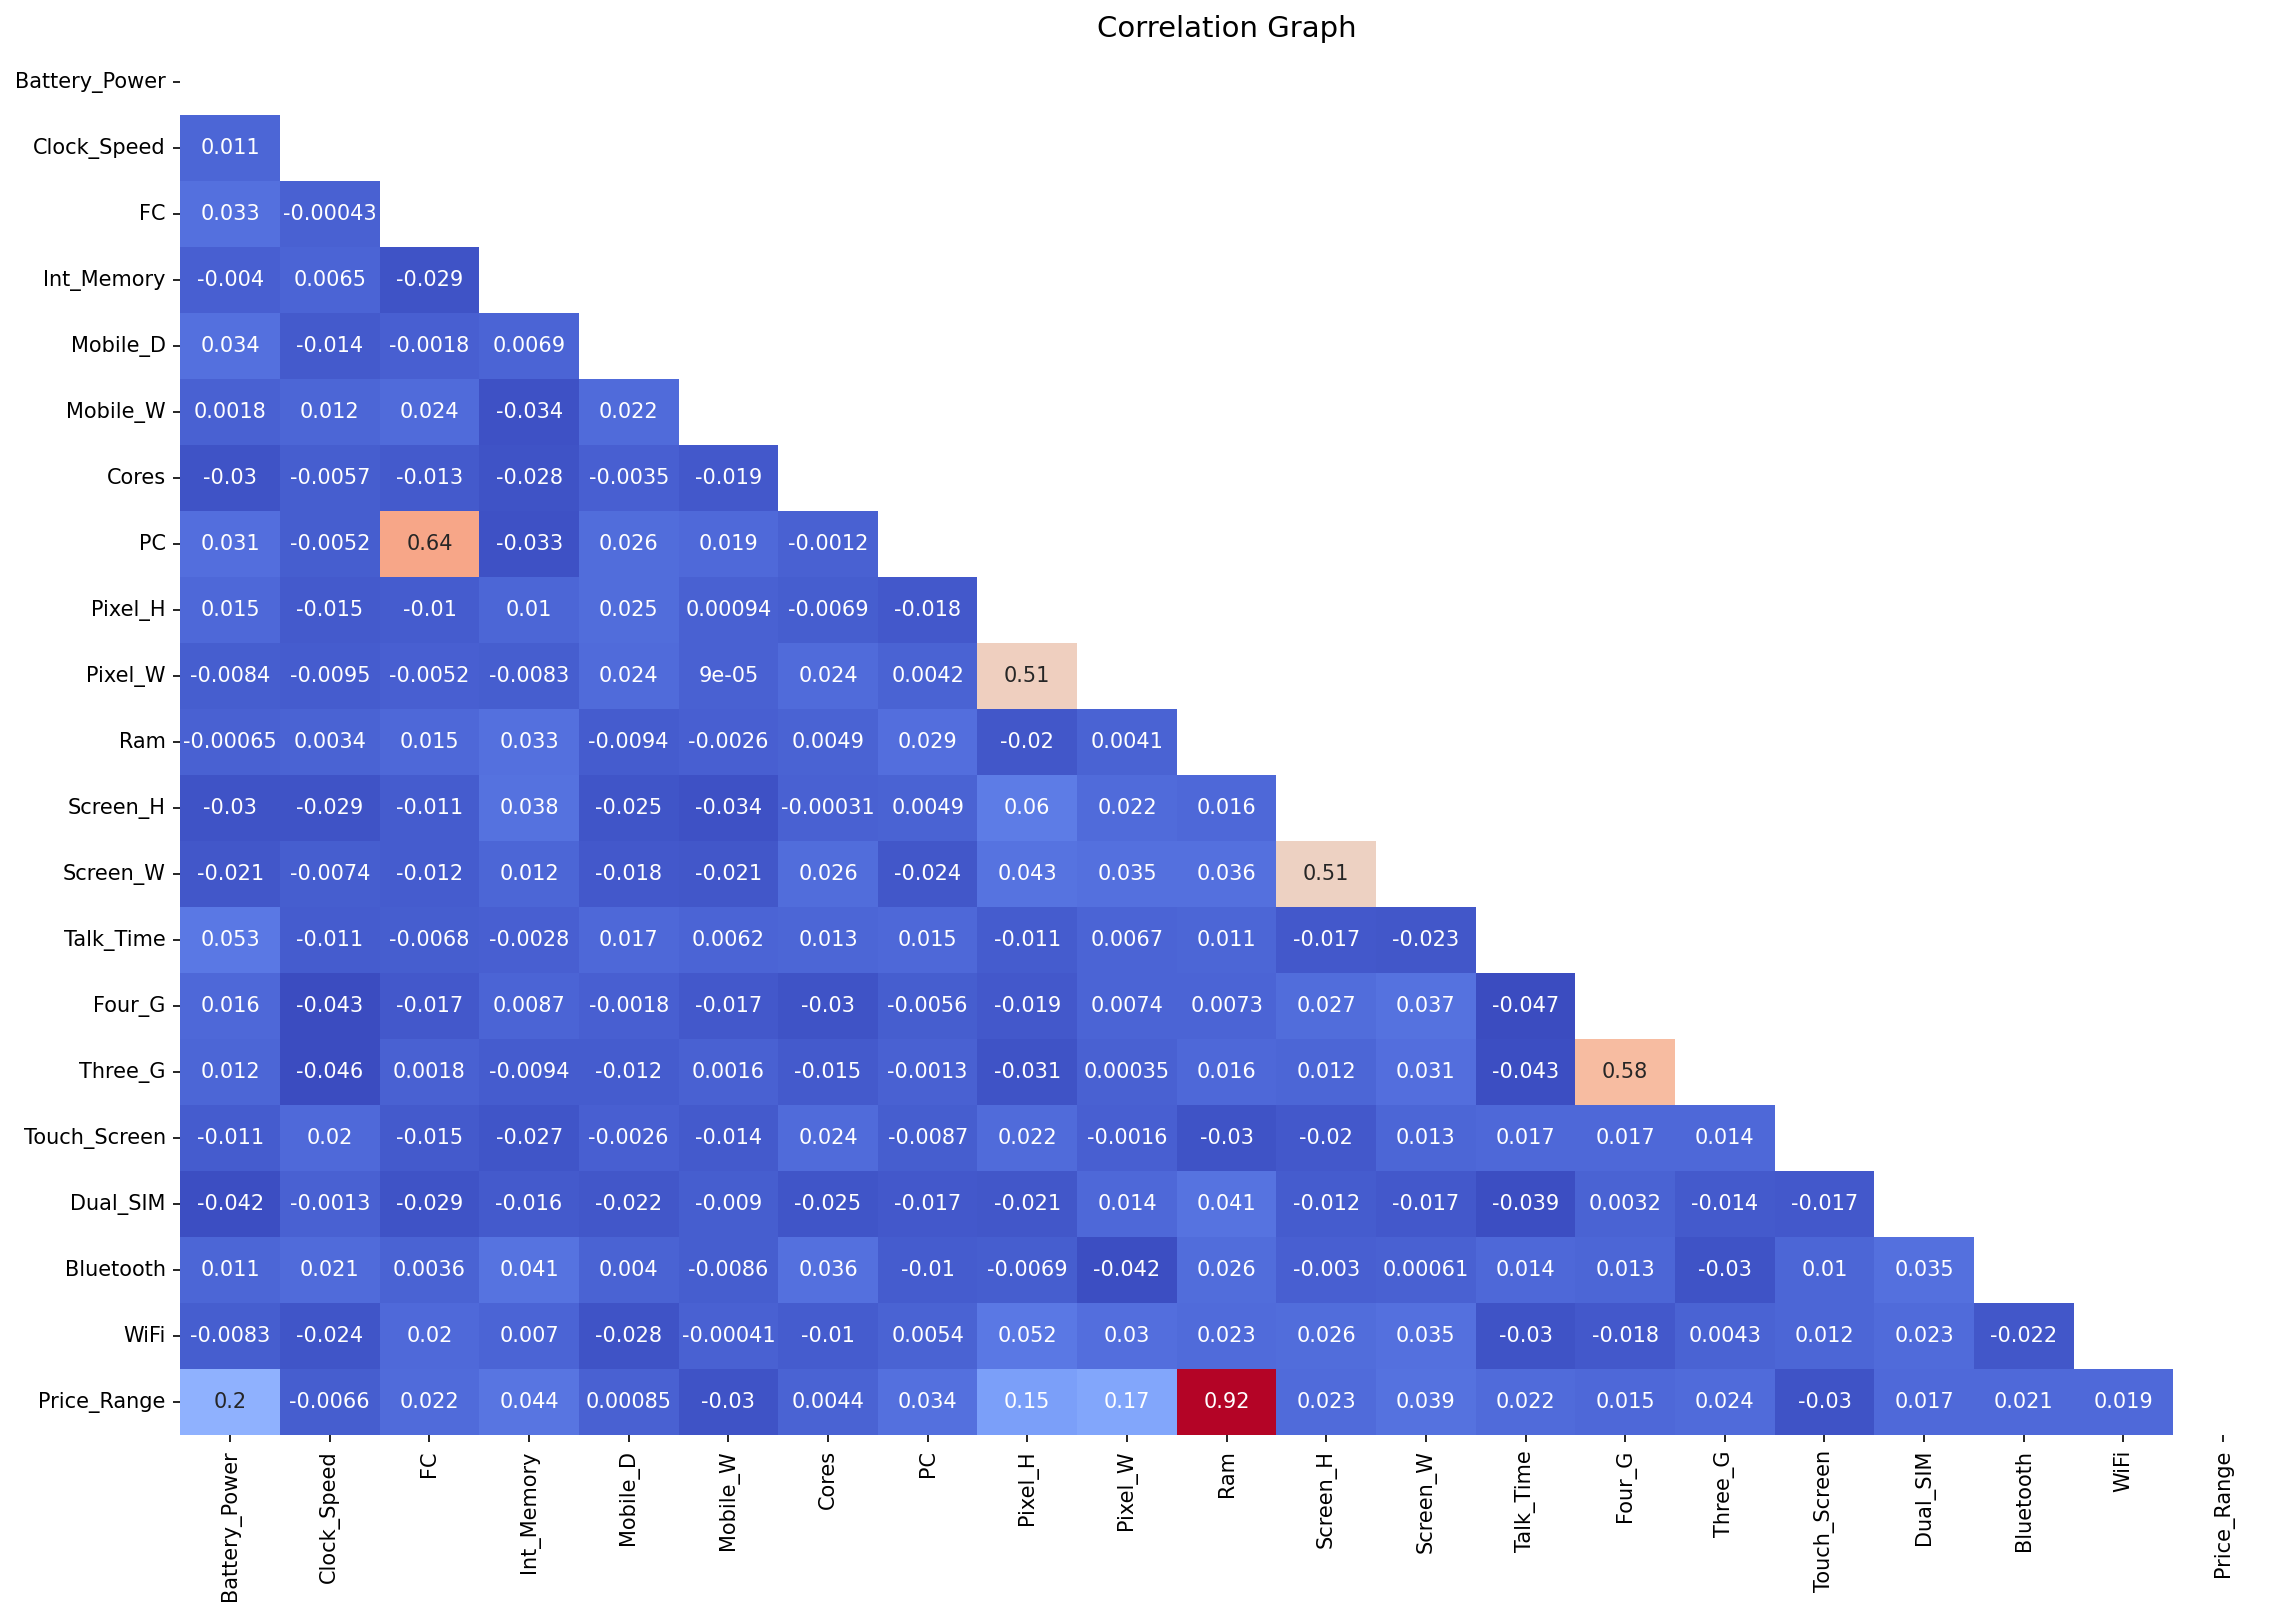

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df = data

plt.figure (figsize = [18,12] ,  dpi = 150 )
plt.title ("Correlation Graph" , fontsize = 14)
matrix = np.triu (df.corr ())
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm', mask = matrix , cbar = False)
plt.show ()

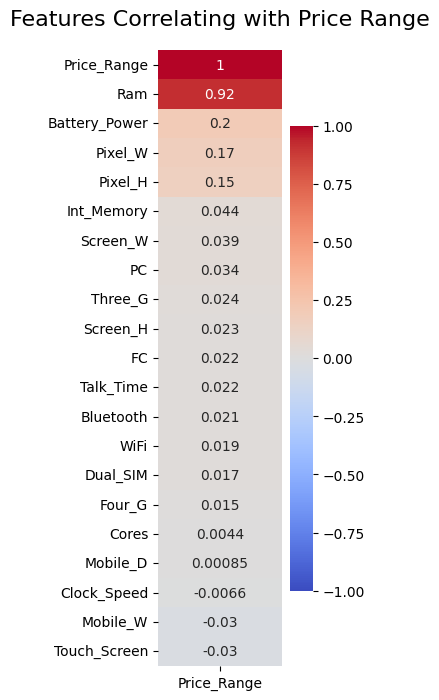

In [38]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (df.corr()[['Price_Range']].sort_values (by = 'Price_Range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':16} , pad = 18);

- "Price_Range" has the highest positive correlation with "Ram" (correlation of 0.92).
- "Price_Range" has quite moderate positive correlation with "Battery_Power","Pixel_W", and "Pixel_H" (0.2, 0.17, 0.15).
- Correlation between "Price_Range" with "Cores", "Mobile_D", "Clock_Speed", "Mobile_W", and "Touch_Screen" are negligible.
- Correlation between "PC" & "FC" is 0.64.
- Correlation between "Three_G" & "Four_G" is 0.58.
- Correlation between "Pixel_W" & "Pixel_H" is 0.51.
- Correlation between "Screen_W" & "Screen_H" is 0.51.

## Visualization

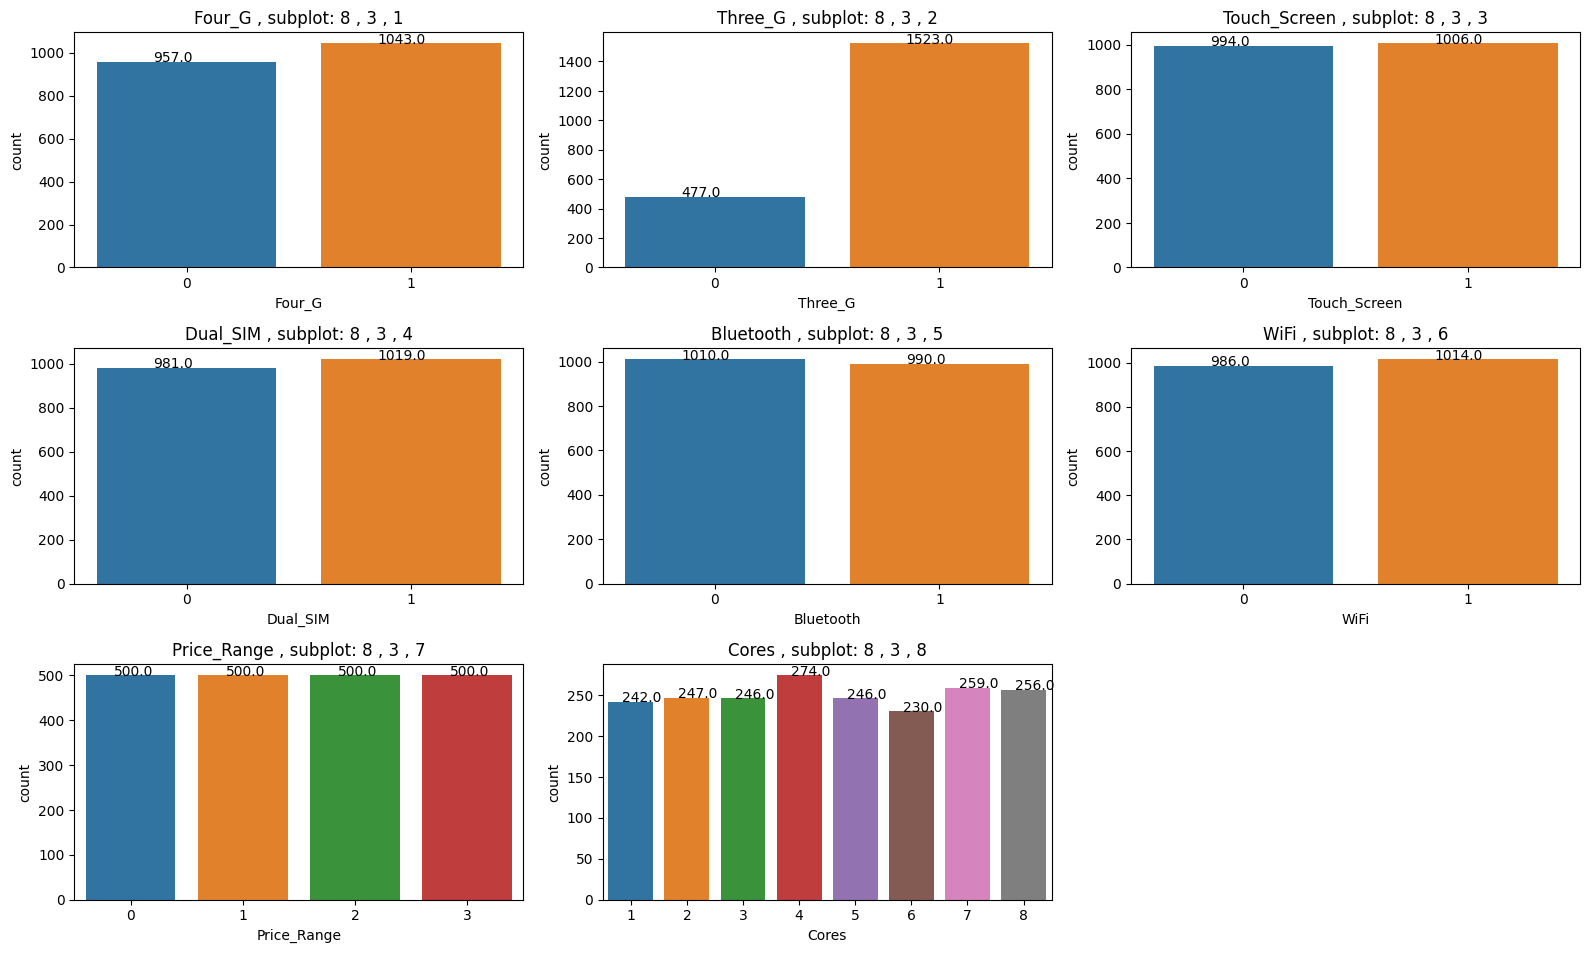

In [40]:
#  Categorical Data
Categorical = ["Four_G" , "Three_G" , "Touch_Screen" , "Dual_SIM" , "Bluetooth" , "WiFi" , "Price_Range" , "Cores"]
#  Plotting Categorical Data
a = len (Categorical)  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure (figsize = (16 , 25))
for i in Categorical:
    plt.subplot (a , b , c)
    plt.title ('{} , subplot: {} , {} , {}'.format (i , a , b , c))
    plt.xlabel (i)
    ax = sns.countplot (x = i , data = df)
    for p in ax.patches:
            ax.annotate ('{:.1f}'.format (p.get_height ()) , (p.get_x () + 0.25 , p.get_height () + 0.01))
    c = c + 1
plt.tight_layout ()
plt.show ()

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Store predicted and original values in separate arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 13.713775354730581
Mean Absolute Error (MAE): 0.26830095537465776
Mean Squared Error (MSE): 0.10469290211930658
Root Mean Squared Error (RMSE): 0.3235628256139858
Root Mean Squared Logarithmic Error (RMSLE): 0.10562024359060107


### Polynomial Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply polynomial feature transformation
degree = 2  # Specify the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test_poly)

Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 16.2711132557209
Mean Absolute Error (MAE): 0.3079340541292913
Mean Squared Error (MSE): 0.1520818349266776
Root Mean Squared Error (RMSE): 0.3899767107490877
Root Mean Squared Logarithmic Error (RMSLE): 0.13406750644806772


### Neural Network

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Assuming you have already loaded and preprocessed your X and Y data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the target variable to categorical
Y_train = to_categorical(Y_train - 1, num_classes=4)
Y_test = to_categorical(Y_test - 1, num_classes=4)

# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(25, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(4, activation='softmax')  # Output layer with 4 units for multiclass classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)

Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1) + 1

# Convert Y_test to numpy array
Y_test_array = np.argmax(Y_test, axis=1) + 1

# Calculate classification accuracy
accuracy = np.mean(Y_pred_classes == Y_test_array)
findError(Y_test_array, Y_pred_array)


# You can also use scikit-learn's accuracy_score to calculate accuracy
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(Y_test, Y_pred_classes)


Epoch 1/100
50/50 [==============================] - 2s 3ms/step - loss: 1.4243 - accuracy: 0.2425
Epoch 2/100
50/50 [==============================] - 0s 3ms/step - loss: 1.3614 - accuracy: 0.3150
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 1.2947 - accuracy: 0.4400
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 1.1370 - accuracy: 0.5425
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8726 - accuracy: 0.6569
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7781
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.8400
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8706
Epoch 9/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8925
Epoch 10/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2741 - accuracy: 0.9087
Epoch 11/

50/50 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 84/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 85/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 86/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 87/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 88/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 89/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 90/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 91/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 92/100
50/50 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 93/100


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the decision tree regressor
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 7.291666666666666
Mean Absolute Error (MAE): 0.1575
Mean Squared Error (MSE): 0.1575
Root Mean Squared Error (RMSE): 0.3968626966596886
Root Mean Squared Logarithmic Error (RMSLE): 0.12136977289388183


### Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Random Forest regressor
model = RandomForestRegressor()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 7.851875
Mean Absolute Error (MAE): 0.16445
Mean Squared Error (MSE): 0.072053
Root Mean Squared Error (RMSE): 0.26842689880114473
Root Mean Squared Logarithmic Error (RMSLE): 0.08281785855106963


### Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Gradient Boosting regressor
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 11.012462730027924
Mean Absolute Error (MAE): 0.2241038680077812
Mean Squared Error (MSE): 0.08044391079889135
Root Mean Squared Error (RMSE): 0.2836263577294807
Root Mean Squared Logarithmic Error (RMSLE): 0.08839582492786763


### Support Vector Regression

In [28]:
from sklearn.svm import SVR

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the SVR model
model = SVR()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 9.29872931045621
Mean Absolute Error (MAE): 0.1959498034301108
Mean Squared Error (MSE): 0.06196478352884789
Root Mean Squared Error (RMSE): 0.2489272655392492
Root Mean Squared Logarithmic Error (RMSLE): 0.07651042195722225


### Bayesian Regression

In [29]:
from sklearn.linear_model import BayesianRidge

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Bayesian Regression model
model = BayesianRidge()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 13.778231403582941
Mean Absolute Error (MAE): 0.2694182433405419
Mean Squared Error (MSE): 0.10479531940692122
Root Mean Squared Error (RMSE): 0.3237210518439003
Root Mean Squared Logarithmic Error (RMSLE): 0.10574641085059908


### K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsRegressor

# Create the K-Nearest Neighbors regressor
model = KNeighborsRegressor()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 4.925000000000001
Mean Absolute Error (MAE): 0.10800000000000001
Mean Squared Error (MSE): 0.05039999999999999
Root Mean Squared Error (RMSE): 0.22449944320643647
Root Mean Squared Logarithmic Error (RMSLE): 0.06738317826129382


### XG Boost

In [31]:
import xgboost as xgb

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
Y_pred = model.predict(dtest)

# Convert predictions and actual values to arrays
Y_pred_array = np.array(Y_pred)
Y_test_array = np.array(Y_test)

findError(Y_test_array, Y_pred_array)

Mean Percentage Error: 8.653673926989239
Mean Absolute Error (MAE): 0.20113140285015108
Mean Squared Error (MSE): 0.0817300023968913
Root Mean Squared Error (RMSE): 0.28588459629174023
Root Mean Squared Logarithmic Error (RMSLE): 0.08327329590513698


### Model Evaluation - Done
### Results of all algorithms are as below, considering Mean Percentage Error
- Linear Regression                           - 13.71%
- Polynomial Regression (Degree 2)            - 16.27%
- Neural Network                              - 8.65%
- Decision Tree                               - 7.29%
- Random Forest                               - 7.85%
- Gradient Boosting                           - 11.01%
- Support Vector Regression                   - 9.29%
- Bayesian Regression                         - 13.78%
- K-nearest Neighbours                        - 4.92%
- XG Boost                                    - 8.65%

As it is clear from the above data, that K-nearest Neighbours performed the best with least error